In [14]:
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
df =  pd.read_pickle('C:\\Users\\z0047cfr\\Project Work\\Factory Demand Model\\Input Data\\input_df4.pkl')

In [15]:
df.index.freq = 'MS'
df['DATE']=df.index
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.loc[df.DATE >= '2015-12-01']


In [16]:
#df['Atrbn_Q_Change in product mix or specifications_NAICS 331_Census'].head()

In [17]:
var_list = ['data',
    'awh_prd_emp_mfg_dur_gds_cal_M_Fred',
        'Civ_lab_force_SA_county_m_Fred', 
            'Profit_margin_perc_Q',
             'Labor_conv_count_M',
            'wage_max',
             'Severance_Amount_millions_Q',
            'All_emp_mfg_dur_gds_SA_MSA_M_Fred',
         'Orders_millions_Q'
           
            ]
# var_list = [
# 'data',
#     'Atrbn_Q_Change in product mix or specifications_NAICS 331_Census',
#     'Revenue_millions_Q',
#     'Profit_margin_perc_Q',
#     'wage_max',
#     'Severance_Amount_millions_Q',
#     'Labor_conv_count_M',
#     'AWH_prd_emp_mfg_CA_M_Fred'
# ]
df2 = df[var_list]
df2 = df2.rename(columns={"data": "Welder Count"})

#df2.head()

# Pearsons Correlation of independent variables with labor demand

In [18]:
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)
    
    #Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear.import seaborn as sns
import matplotlib.pyplot as plt
def spearman(frame, features):
    global spr
    spr = pd.DataFrame()
    spr['Factors'] = features
    spr['Correlation'] = [frame[f].corr(frame['Labor Demand'], ) for f in features]
    spr = spr.sort_values('Correlation')
    plt.figure(figsize=(6, 0.5*len(features)))
    sns.set(font_scale=1.5)
    sns.barplot(data=spr, y='Factors', x='Correlation', orient='h')
    #print(spr)
    
    
quantitative = [f for f in df2.columns if df2.dtypes[f] != 'object']
features = quantitative
spearman(df2, features)

KeyError: 'Labor Demand'

# Heat Maps to check inter correlations among Variables 

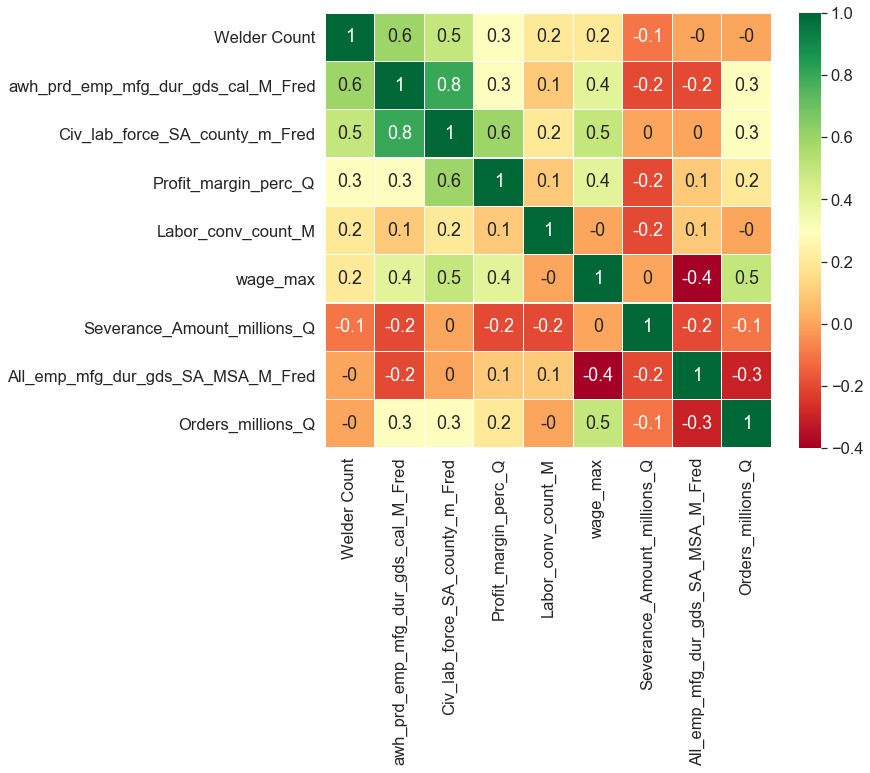

In [19]:
    sns.heatmap(df2.corr('pearson').round(1),annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->correlation matrix
    fig=plt.gcf()
    fig.set_size_inches(10,8)
    plt.show()

In [17]:
def bivariate_visuals(data, xvar):
#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
    normalised_df = pd.DataFrame()
    normalised_df['Labor Demand'] = data['Labor Demand']
    normalised_df[xvar] = data[xvar]
    normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std() #(normalised_df.max() - normalised_df.min()) 



    lag_df = data.shift(-1)
    lag_normalised_df = pd.DataFrame()
    lag_normalised_df['y'] = lag_df['Labor Demand']
    lag_normalised_df[xvar] = lag_df[xvar]
    lag_normalised_df = (lag_df - lag_df.mean()) / lag_df.std() #(normalised_df.max() - normalised_df.min()) 
    #lag_normalised_df[xvar].head()
    sns.set(font_scale=1)
    
    plt.figure(figsize=(5, 5));

    # histogram with distribution
    sns.distplot(data[xvar]);

    # pair plot
    g = sns.pairplot(data, y_vars=["Labor Demand"], x_vars=xvar, kind="reg", height=5, aspect=3);
    g.map(corrfunc);

    # plot against time
    plt.figure(figsize=(20, 5));
    ax = sns.pointplot(x = normalised_df.index, y = normalised_df['Labor Demand'], color = 'blue', label='y var');
    ax = sns.pointplot(x = normalised_df.index, y = normalised_df[xvar], color = 'red', label='x var');
    blue_patch = mpatches.Patch(color='blue', label='labor demand');
    red_patch = mpatches.Patch(color='red', label=xvar);
    plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 10);
    ax.tick_params(axis=u'both', which=u'both',length=0, rotation=45);

In [18]:
Data = df2

# Variable :  Average working hours of production of Employees manufacturing durable goods in california collected monthly
Relationship: Positive

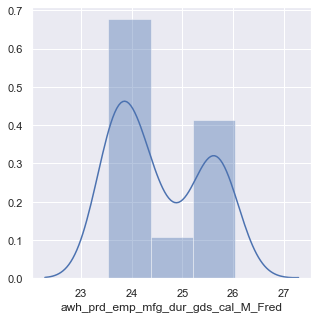

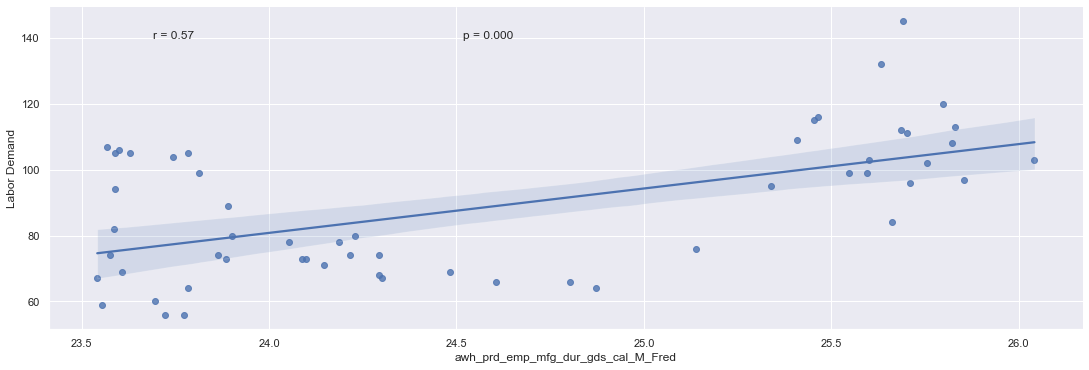

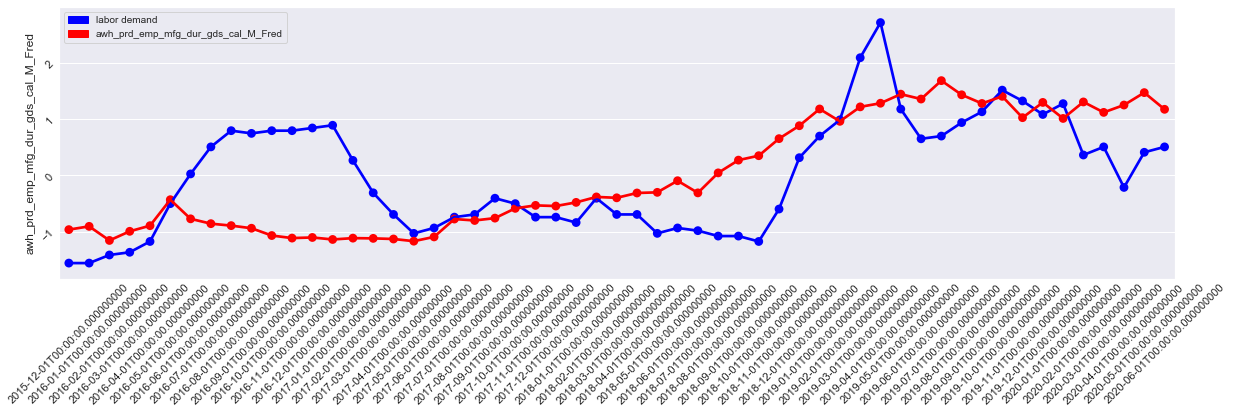

In [23]:
xvar = Data.columns.tolist()[1]
bivariate_visuals(Data, xvar);

# Civilian Labor Force in SA county - Monthly



### Relationship: Positive


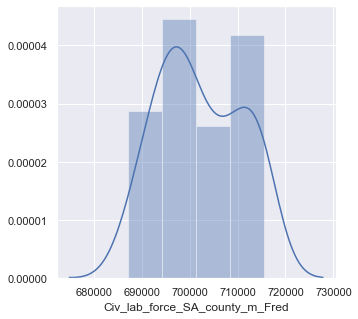

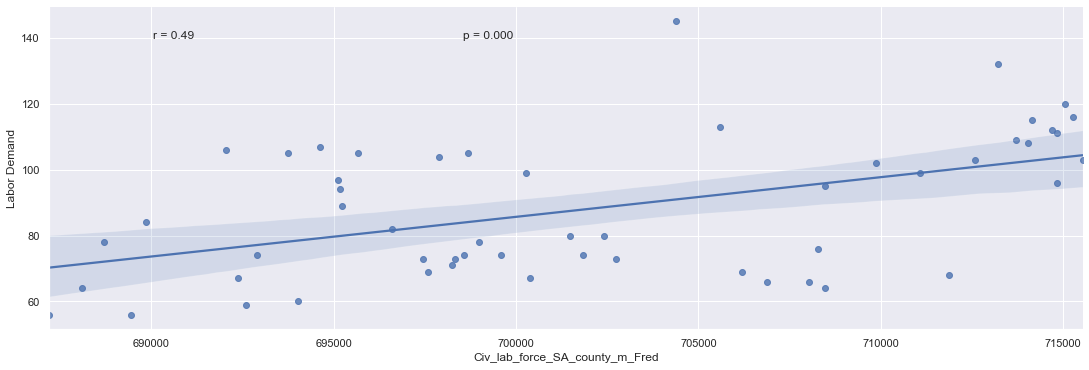

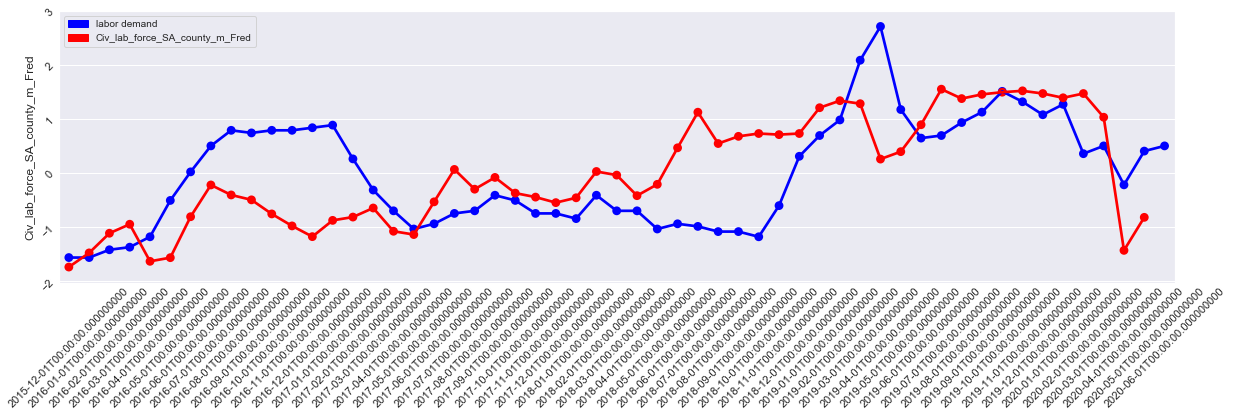

In [24]:
xvar = Data.columns.tolist()[2]
bivariate_visuals(Data, xvar);

# Monthly Labor Conversion count from temp to permanent in the Sacramento Factory

### Relationship: Negative


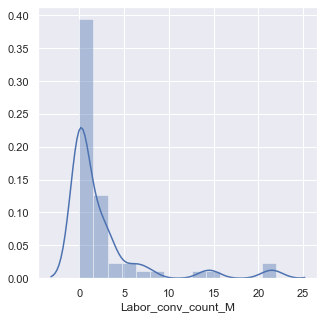

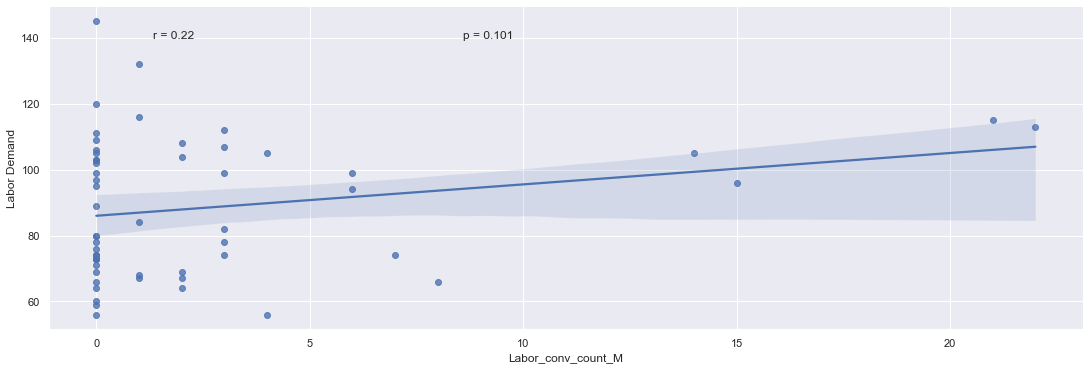

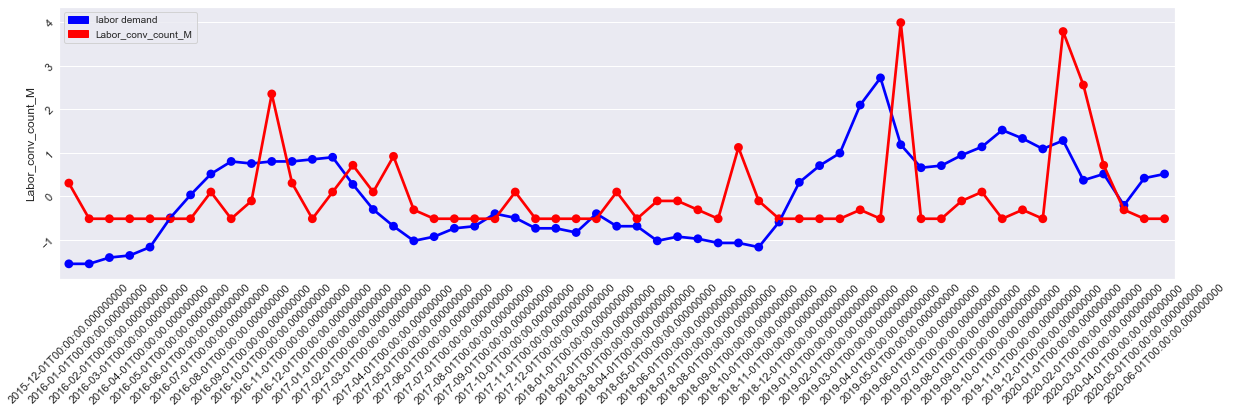

In [32]:
xvar = Data.columns.tolist()[7]
bivariate_visuals(Data, xvar);

# Variable: Profit Margin percent of the Overall Mobility business of Siemens - quarterly
Relationship: Positive

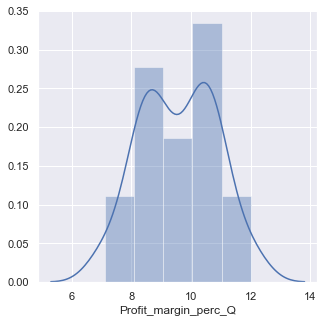

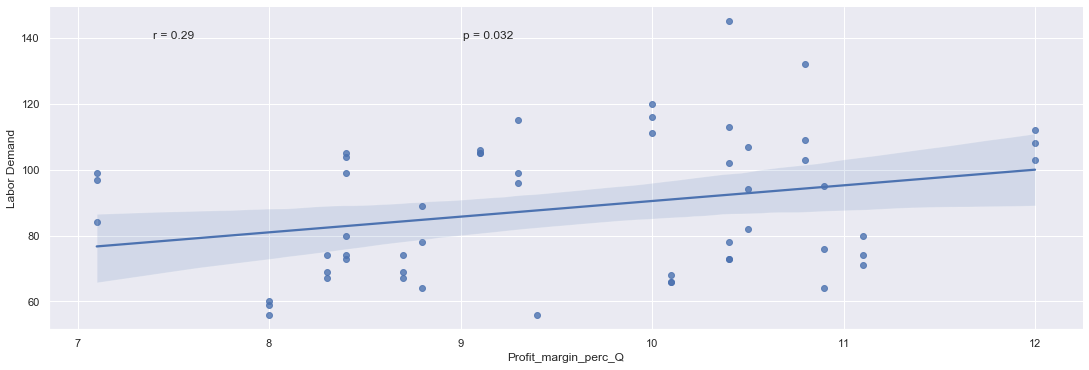

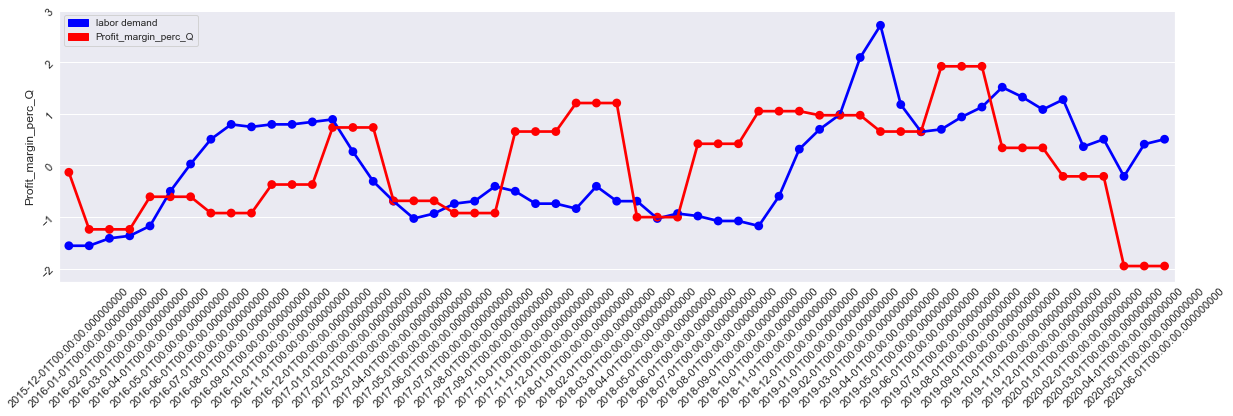

In [35]:
xvar = Data.columns.tolist()[5]
bivariate_visuals(Data, xvar);

In [34]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')